___

<a href='http://www.votasoft.ca'> <img src='./yottaII.png' /></a>
___
<center>*Copyright Votasoft AI 2018*</center>
<center>*For more information, visit us at www.votasoft.ca*</center>

In [66]:
from IPython.core.display import HTML
import urllib.request as request

HTML(request.urlopen('http://bit.ly/1Bf5Hft').read().decode('utf-8') )

# Stock Market Analysis POC

### Please Note: 

We'll be analyzing stock market data related to a few Silicon Valley companies, from Jan 1 2016 to the current date. Keep in mind that this POC is mainly just to create a spectrum of financial signals that will be fed into the rules engine to make trading decisions.

We will be using **Quandl REST API** to obtain free data

### POC Part 0: Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* Define Quandle API Key

In [2]:
import quandl
quandl.ApiConfig.api_key = 'r_CcsvCHW-GNSLGY6pgY'

____
## POC Part 1: Use Quandle to get the stock data

### Tesla Stock (TSLA)
### Apple (AAPL)
### NVIDIA (NVDA)


In [101]:
TSLA = quandl.get_table('WIKI/PRICES', ticker='TSLA')
AAPL = quandl.get_table('WIKI/PRICES', ticker='AAPL')
NVDA = quandl.get_table('WIKI/PRICES', ticker='NVDA')

In [102]:
columns = ['date','open','high','low','close','volume','adj_open','adj_high', 'adj_low', 'adj_close', 'adj_volume']
tsla_stock = TSLA[columns]
aapl_stock = AAPL[columns]
nvda_stock = NVDA[columns]

In [103]:
tsla_stock['date'] = tsla_stock['date'].apply(pd.to_datetime)
aapl_stock['date'] = aapl_stock['date'].apply(pd.to_datetime)
nvda_stock['date'] = nvda_stock['date'].apply(pd.to_datetime)

/home/unixdev/anaconda3/envs/pyfinance/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/unixdev/anaconda3/envs/pyfinance/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/unixdev/anaconda3/envs/pyfinance/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [104]:
tsla_stock.head()

,date,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,19.00,25.0000,17.54,23.89,18766300.0
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,25.79,30.4192,23.30,23.83,17187100.0
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,25.00,25.9200,20.27,21.96,8218800.0
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,23.00,23.1000,18.71,19.20,5139800.0
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,20.00,20.0000,15.83,16.11,6866900.0


In [105]:
tsla_stock.set_index('date', inplace=True)
aapl_stock.set_index('date', inplace=True)
nvda_stock.set_index('date', inplace=True)

In [106]:
tsla_stock = tsla_stock.loc['2010-01-01':]
aapl_stock = aapl_stock.loc['2010-01-01':]
nvda_stock = nvda_stock.loc['2010-01-01':]

In [107]:
nvda_stock.head()

,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,
2010-01-04,18.51,18.6200,18.11,18.49,20005100.0,17.175423,17.277492,16.804263,17.156865,20005100.0
2010-01-05,18.51,18.9600,18.42,18.76,18216200.0,17.175423,17.592978,17.091912,17.407398,18216200.0
2010-01-06,18.75,18.9200,18.57,18.88,16229200.0,17.398119,17.555862,17.231097,17.518746,16229200.0
2010-01-07,18.78,18.8600,18.37,18.51,13694800.0,17.425956,17.500188,17.045517,17.175423,13694800.0
2010-01-08,18.36,18.6821,18.25,18.55,11954200.0,17.036238,17.335115,16.934169,17.212539,11954200.0


## POC Part 2: Data Visualization

** Let's visualize the data **


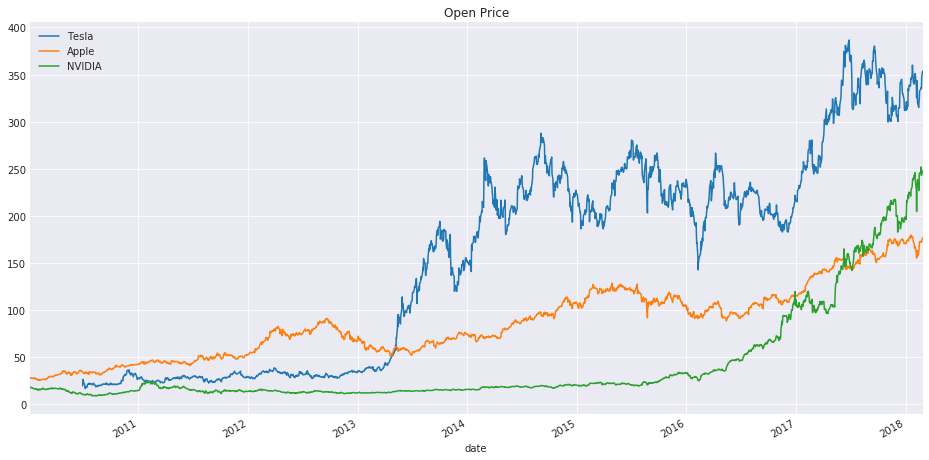

In [108]:
# Use adjusted Open prices!
tsla_stock['adj_open'].plot(label='Tesla', grid=True, figsize=(16,8),title='Open Price')
aapl_stock['adj_open'].plot(label='Apple', grid=True)
nvda_stock['adj_open'].plot(label='NVIDIA', grid=True)
plt.legend()

In [109]:
MOVING_AVERAGE_PERIOD=20

In [110]:
nvda_stock['B-Close20MA'] = nvda_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).mean()
nvda_stock['B-Upper'] = nvda_stock['B-Close20MA'] + 2 * (nvda_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).std())
nvda_stock['B-Lower'] = nvda_stock['B-Close20MA'] - 2 * (nvda_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).std())

In [111]:
tsla_stock['B-Close20MA'] = tsla_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).mean()
tsla_stock['B-Upper'] = tsla_stock['B-Close20MA'] + 2 * (tsla_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).std())
tsla_stock['B-Lower'] = tsla_stock['B-Close20MA'] - 2 * (tsla_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).std())

In [112]:
aapl_stock['B-Close20MA'] = aapl_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).mean()
aapl_stock['B-Upper'] = aapl_stock['B-Close20MA'] + 2 * (aapl_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).std())
aapl_stock['B-Lower'] = aapl_stock['B-Close20MA'] - 2 * (aapl_stock['adj_close'].rolling(MOVING_AVERAGE_PERIOD).std())

In [113]:
#Bollinger columns 
b_cols = ['adj_close', 'B-Close20MA', 'B-Upper', 'B-Lower']

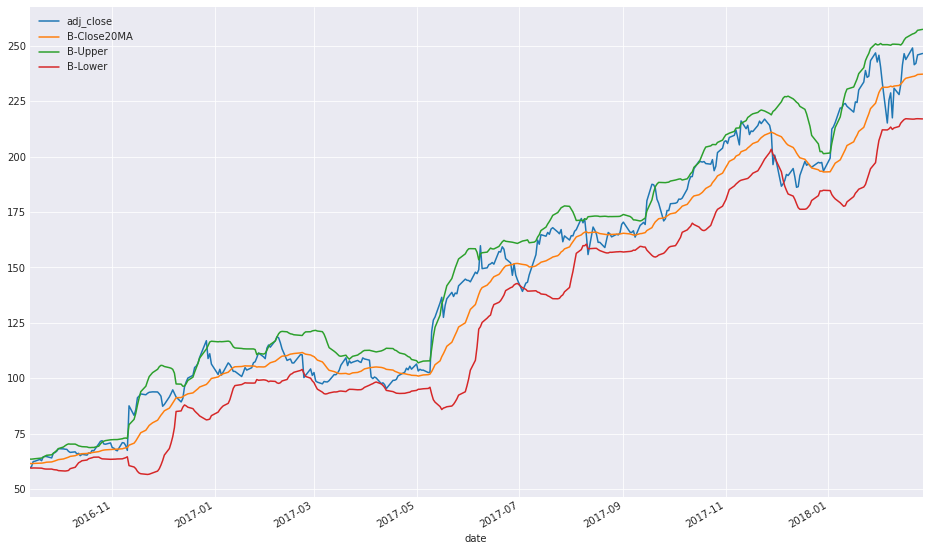

In [114]:
nvda_stock[b_cols].tail(365).plot(grid=True, figsize=(16,10))

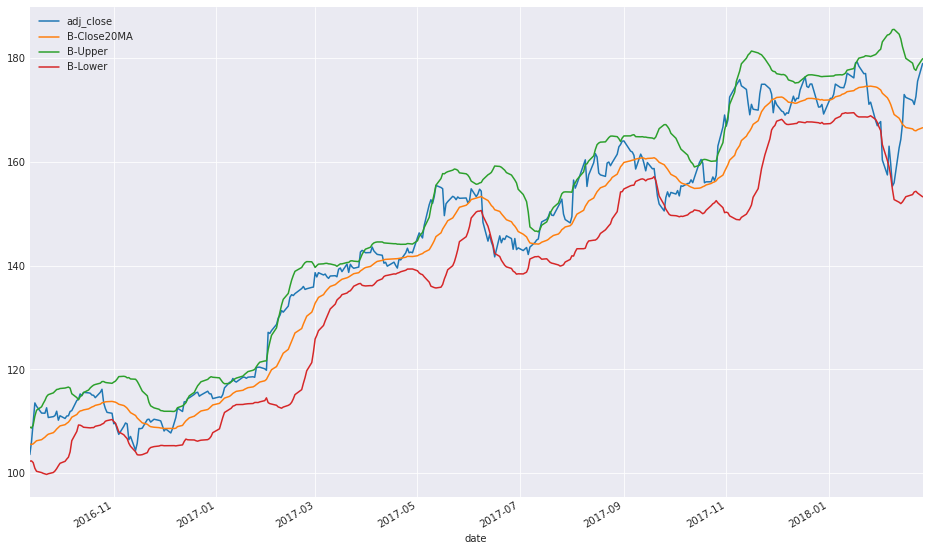

In [115]:
aapl_stock[b_cols].tail(365).plot(grid=True, figsize=(16,10))

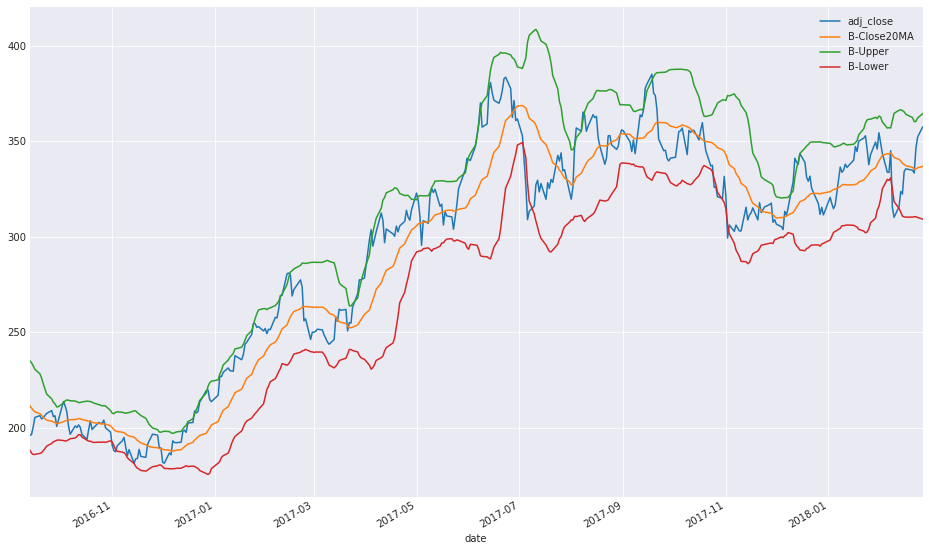

In [116]:
tsla_stock[b_cols].tail(365).plot(grid=True, figsize=(16,10))

____

** Plot Tesla, Apple, NVIDIA Volume of stock traded each day **

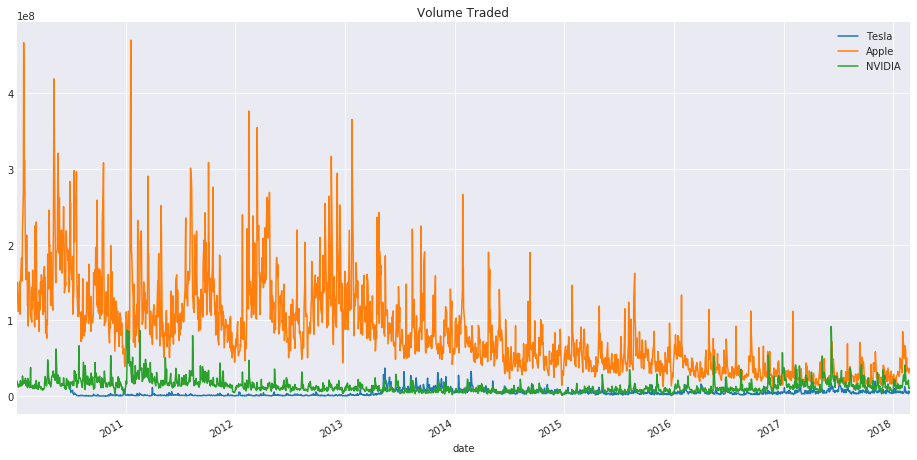

In [117]:
tsla_stock['adj_volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
aapl_stock['adj_volume'].plot(label='Apple')
nvda_stock['adj_volume'].plot(label='NVIDIA')
plt.legend()

** What was the date of the maximum trading volume for Tesla, Apple, NVIDIA?**


In [118]:
print( 'TSLA Highest Volume on: %s' % tsla_stock['volume'].argmax())

TSLA Highest Volume on: 2013-05-14 00:00:00


** Tesla shares crater as Wall Street reacts to bid for SolarCity **

In [119]:
print( 'AAPL Highest Volume on: %s' % aapl_stock['volume'].argmax())

AAPL Highest Volume on: 2014-09-09 00:00:00


 ** When customers turn on their Apple devices, they're inundated with options to buy services from Apple 10-a-month Apple Music subscriptions, iCloud storage plans, iTunes music, Apple Care service plans and paid apps from the app store. Apple even takes a cut off of every purchase you make with Apple Pay
For the first time ever on Tuesday, Apple pulled back the curtain on its services revenue, revealing that it sold 19.9 billion worth of services to customers in 2015, up 10% from a year earlier. **

In [120]:
print( 'NVDA Highest Volume on: %s' % nvda_stock['volume'].argmax())

NVDA Highest Volume on: 2017-06-09 00:00:00


** Citron said the bullish calls by fellow Wall Street operators UBS, RBC, and Citi were overblown. As the bulls point to growing artificial intelligence, data center, and machine learning demands, Citron points out that their core business, gaming computers, has no reason to rapidly expand soon. **

____

** Open Price Time Series Visualization ** - which company is more valuable? Let's take a look at the total market cap of each company, not just the stock price. 
:( Unfortunately our Quandl data doesn't have that information of total units of stock present. 
** What can we do? ** We can do a simple calcualtion to try to represent total money traded by multplying the Adjusted Volume column by the Adjusted Open price. 
** Note ** This still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)

** Create a new column for each dataframe called "Total Traded" which is the Adj.Open Price multiplied by the Adj.Volume Traded **

In [121]:
# Adjusted Prices!
tsla_stock['total_traded'] = tsla_stock['adj_open'] * tsla_stock['adj_volume']
aapl_stock['total_traded'] = aapl_stock['adj_open'] * aapl_stock['adj_volume']
nvda_stock['total_traded'] = nvda_stock['adj_open'] * nvda_stock['adj_volume']

** Plot this "Total Traded" against the time index.**

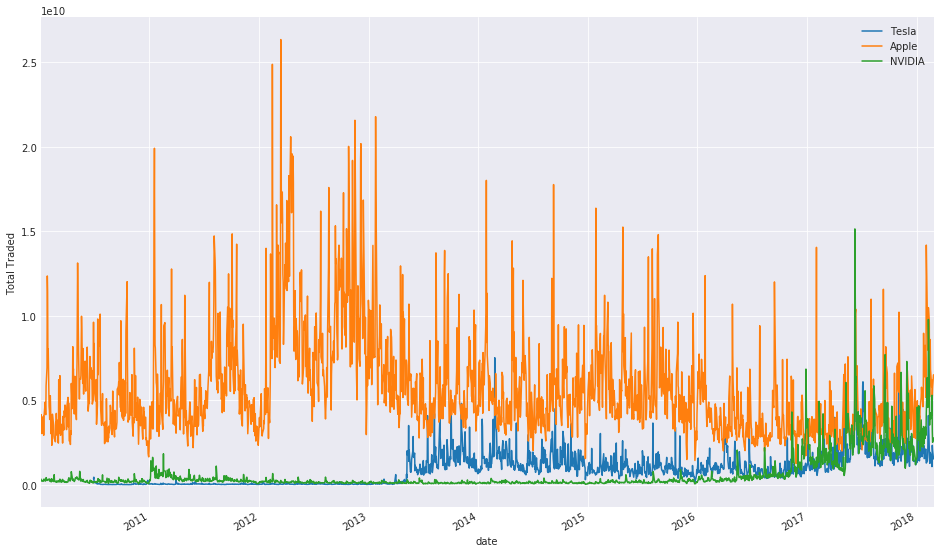

In [122]:
# Total Traded
tsla_stock['total_traded'].plot(label='Tesla', grid=True, figsize=(16,10))
aapl_stock['total_traded'].plot(label='Apple', grid=True)
nvda_stock['total_traded'].plot(label='NVIDIA', grid=True)
plt.legend()
plt.ylabel('Total Traded')

** Telsa and NVIDIA had a trading spike on the same day? **

In [123]:
tsla_stock['total_traded'].argmax()

Timestamp('2014-02-25 00:00:00')

In [124]:
aapl_stock['total_traded'].argmax()

Timestamp('2012-03-14 00:00:00')

In [125]:
nvda_stock['total_traded'].argmax()

Timestamp('2017-06-09 00:00:00')

____

** Plot MA (Moving Averages). Plot out the MA50 and MA200 for TSLA **

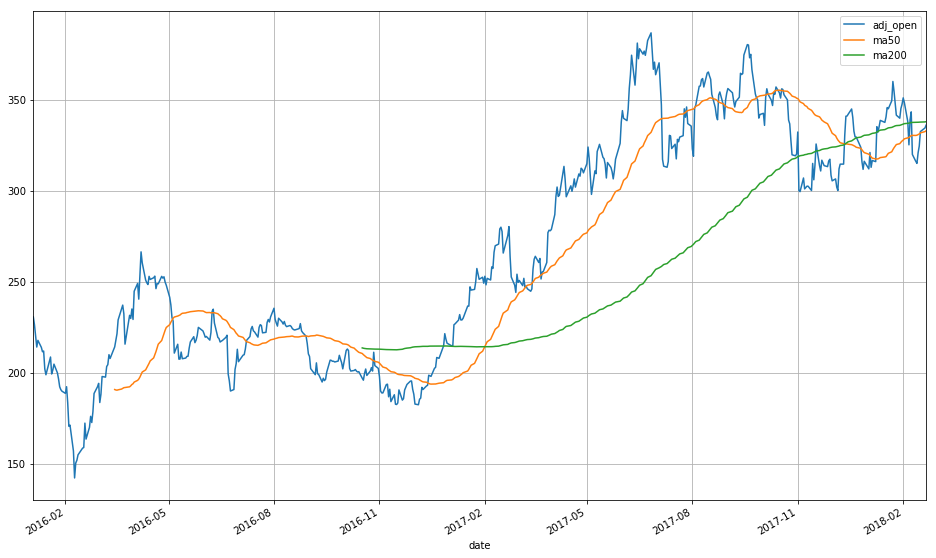

In [28]:
# Code here
tsla_stock['ma50'] = tsla_stock['adj_open'].rolling(50).mean()
tsla_stock['ma200'] = tsla_stock['adj_open'].rolling(200).mean()
tsla_stock[['adj_open','ma50','ma200']].plot(label='TESLA', grid=True, figsize=(16,10))

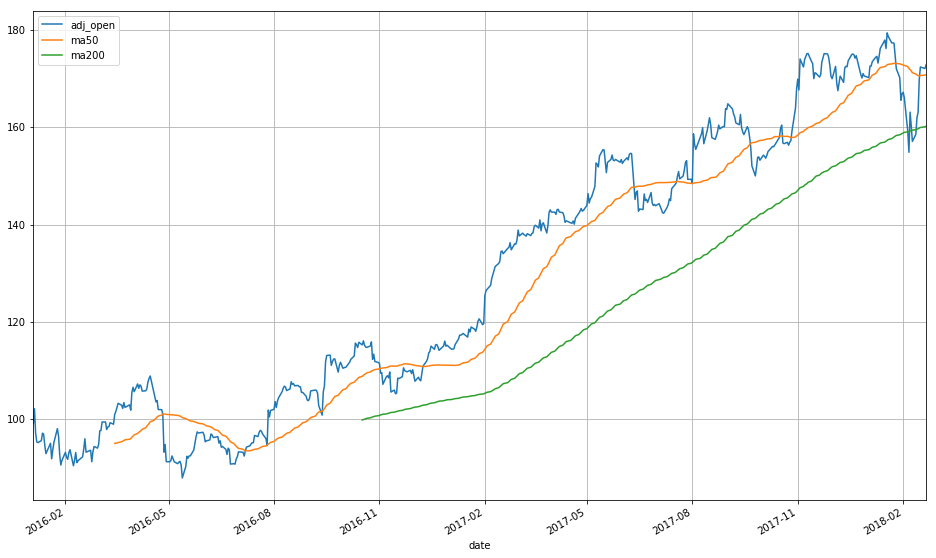

In [29]:
aapl_stock['ma50'] = aapl_stock['adj_open'].rolling(50).mean()
aapl_stock['ma200'] = aapl_stock['adj_open'].rolling(200).mean()
aapl_stock[['adj_open','ma50','ma200']].plot(label='APPLE', grid=True, figsize=(16,10))

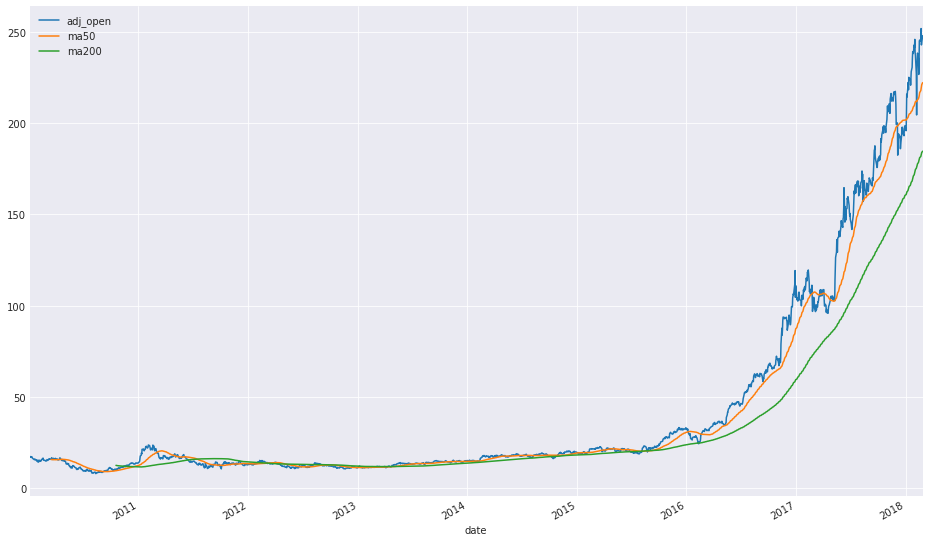

In [126]:
nvda_stock['ma50'] = nvda_stock['adj_open'].rolling(50).mean()
nvda_stock['ma200'] = nvda_stock['adj_open'].rolling(200).mean()
nvda_stock[['adj_open','ma50','ma200']].plot(label='NVIDIA', grid=True, figsize=(16,10))

______

** Stocks correlation? All three are the technology stocks. I would expect Apple and NVIDIA to be more correlated but I also so TSLA and NVDA trade large volumes on the same day **

In [127]:
from pandas.plotting import scatter_matrix

In [128]:
sv_comp = pd.concat([tsla_stock['adj_open'],aapl_stock['adj_open'],nvda_stock['adj_open']],axis=1)

In [129]:
sv_comp.columns = ['TESLA Open','APPLE Open','NVIDIA Open']

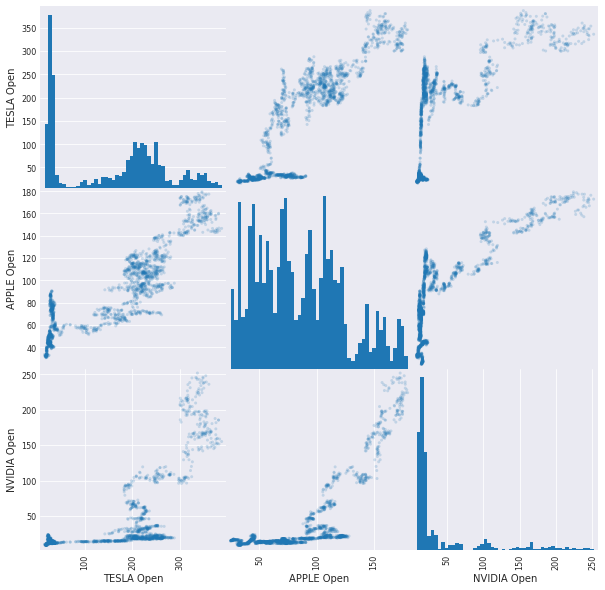

In [130]:
scatter_matrix(sv_comp,figsize=(10,10),alpha=0.2,hist_kwds={'bins':50});

_____
### Candlestick chart


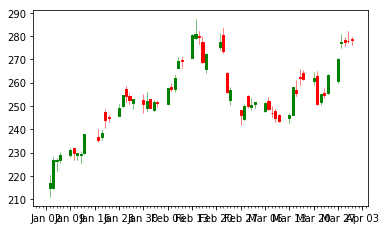

In [39]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Reset the index to get a column of January Dates
tsla_reset = tsla_stock.loc['2017-01':'2017-03'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
tsla_reset['date_ax'] = tsla_reset['date'].apply(lambda date: date2num(date))
tsla_values = [tuple(vals) for vals in tsla_reset[['date_ax', 'adj_open', 'adj_high', 'adj_low', 'adj_close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, tsla_values, width=0.6, colorup='g',colordown='r');

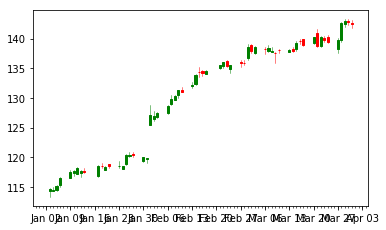

In [40]:
# Reset the index to get a column of January Dates
aapl_reset = aapl_stock.loc['2017-01':'2017-03'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
aapl_reset['date_ax'] = aapl_reset['date'].apply(lambda date: date2num(date))
aapl_values = [tuple(vals) for vals in aapl_reset[['date_ax', 'adj_open', 'adj_high', 'adj_low', 'adj_close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, aapl_values, width=0.6, colorup='g',colordown='r');

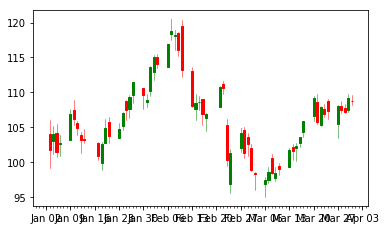

In [41]:
# Rest the index to get a column of January Dates
nvda_reset = nvda_stock.loc['2017-01':'2017-03'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
nvda_reset['date_ax'] = nvda_reset['date'].apply(lambda date: date2num(date))
nvda_values = [tuple(vals) for vals in nvda_reset[['date_ax', 'adj_open', 'adj_high', 'adj_low', 'adj_close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, nvda_values, width=0.6, colorup='g',colordown='r');

____
# POC 3: Basic Financial Analysis

Let's focus on a few key financial calculations. 
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [82]:
tsla_stock['returns'] = (tsla_stock['adj_close'] / tsla_stock['adj_close'].shift(1) ) - 1

In [84]:
tsla_stock['returns'] = tsla_stock['adj_close'].pct_change(1)
tsla_stock.head()

,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,B-Close20MA,B-Upper,B-Lower,total_traded,ma50,ma200,returns
date,,,,,,,,,,,,,,,,,
2016-01-04,230.72,231.38,219.00,223.41,6827146.0,230.72,231.38,219.00,223.41,6827146.0,NaN,NaN,NaN,1.575159e+09,NaN,NaN,NaN
2016-01-05,226.36,226.89,220.00,223.43,3186752.0,226.36,226.89,220.00,223.43,3186752.0,NaN,NaN,NaN,7.213532e+08,NaN,NaN,0.000090
2016-01-06,220.00,220.05,215.98,219.04,3779128.0,220.00,220.05,215.98,219.04,3779128.0,NaN,NaN,NaN,8.314082e+08,NaN,NaN,-0.019648
2016-01-07,214.19,218.44,213.67,215.65,3554251.0,214.19,218.44,213.67,215.65,3554251.0,NaN,NaN,NaN,7.612850e+08,NaN,NaN,-0.015477
2016-01-08,217.86,220.44,210.77,211.00,3628058.0,217.86,220.44,210.77,211.00,3628058.0,NaN,NaN,NaN,7.904087e+08,NaN,NaN,-0.021563


In [85]:
aapl_stock['returns'] = (aapl_stock['adj_close'] / aapl_stock['adj_close'].shift(1) ) - 1
aapl_stock['returns'] = aapl_stock['adj_close'].pct_change(1)
aapl_stock.head()

,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,B-Close20MA,B-Upper,B-Lower,total_traded,ma50,ma200,returns
date,,,,,,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,99.136516,101.801154,98.547165,101.783763,67649387.0,NaN,NaN,NaN,6.706525e+09,NaN,NaN,NaN
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,102.170223,102.266838,98.943286,99.233131,55790992.0,NaN,NaN,NaN,5.700178e+09,NaN,NaN,-0.025059
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,97.155911,98.904640,96.489269,97.291172,68457388.0,NaN,NaN,NaN,6.651040e+09,NaN,NaN,-0.019570
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,95.339552,96.740467,93.165717,93.185040,81094428.0,NaN,NaN,NaN,7.731506e+09,NaN,NaN,-0.042205
2016-01-08,98.55,99.110,96.76,96.96,70798016.0,95.213952,95.754996,93.484546,93.677776,70798016.0,NaN,NaN,NaN,6.740959e+09,NaN,NaN,0.005288


In [131]:
nvda_stock['returns'] = (nvda_stock['adj_close'] / nvda_stock['adj_close'].shift(1) ) - 1
nvda_stock['returns'] = nvda_stock['adj_close'].pct_change(1)
nvda_stock.head()

,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,B-Close20MA,B-Upper,B-Lower,total_traded,ma50,ma200,returns
date,,,,,,,,,,,,,,,,,
2010-01-04,18.51,18.6200,18.11,18.49,20005100.0,17.175423,17.277492,16.804263,17.156865,20005100.0,NaN,NaN,NaN,3.435961e+08,NaN,NaN,NaN
2010-01-05,18.51,18.9600,18.42,18.76,18216200.0,17.175423,17.592978,17.091912,17.407398,18216200.0,NaN,NaN,NaN,3.128709e+08,NaN,NaN,0.014602
2010-01-06,18.75,18.9200,18.57,18.88,16229200.0,17.398119,17.555862,17.231097,17.518746,16229200.0,NaN,NaN,NaN,2.823576e+08,NaN,NaN,0.006397
2010-01-07,18.78,18.8600,18.37,18.51,13694800.0,17.425956,17.500188,17.045517,17.175423,13694800.0,NaN,NaN,NaN,2.386450e+08,NaN,NaN,-0.019597
2010-01-08,18.36,18.6821,18.25,18.55,11954200.0,17.036238,17.335115,16.934169,17.212539,11954200.0,NaN,NaN,NaN,2.036546e+08,NaN,NaN,0.002161


* Plot a histogram of each company's returns. Separately & stack them on top of each other. 
* Which stock is the most **"volatile"**? *(as judged by the variance in the daily returns)*

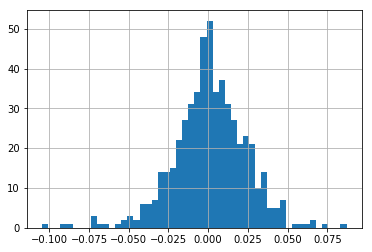

In [87]:
tsla_stock['returns'].hist(bins=50)

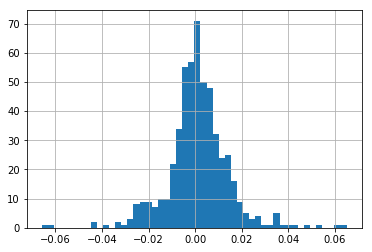

In [88]:
aapl_stock['returns'].hist(bins=50)

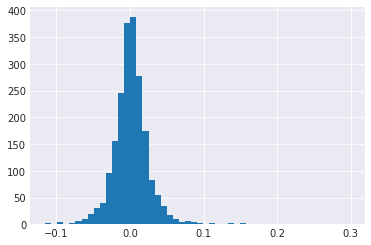

In [132]:
nvda_stock['returns'].hist(bins=50)

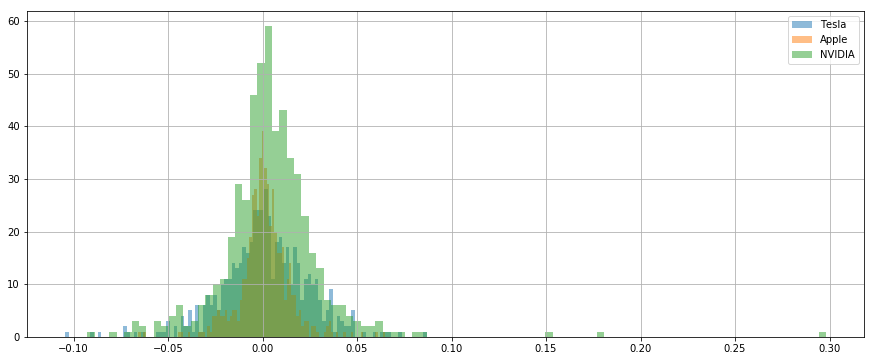

In [92]:
tsla_stock['returns'].hist(bins=100,label='Tesla',figsize=(15,6),alpha=0.5)
aapl_stock['returns'].hist(bins=100,label='Apple',alpha=0.5)
nvda_stock['returns'].hist(bins=100,label='NVIDIA',alpha=0.5)
plt.legend()

** Plot KDE instead of histograms for another view point. Which stock has the widest plot? **

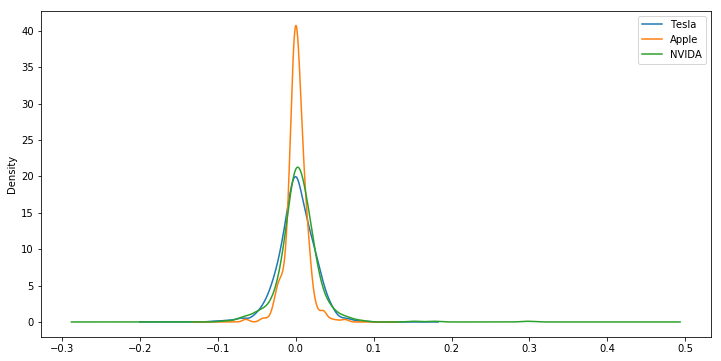

In [93]:
tsla_stock['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
aapl_stock['returns'].plot(kind='kde',label='Apple')
nvda_stock['returns'].plot(kind='kde',label='NVIDA')
plt.legend()

** Plot Box plots comparing the returns. **

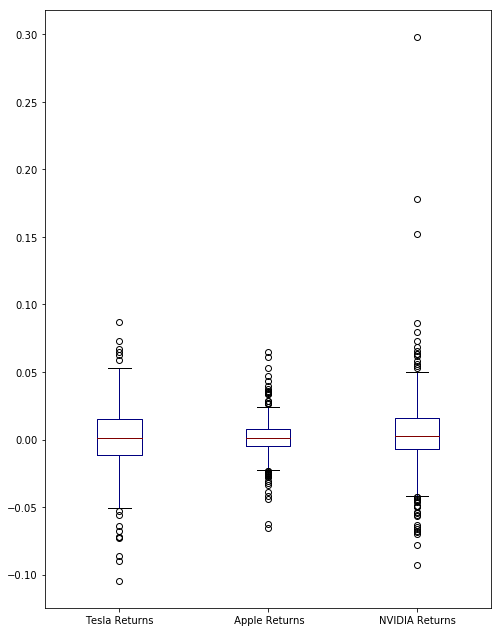

In [94]:
box_df = pd.concat([tsla_stock['returns'],aapl_stock['returns'],nvda_stock['returns']],axis=1)
box_df.columns = ['Tesla Returns',' Apple Returns','NVIDIA Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. **
* This helps answer the questions of how related the companies are. Is Tesla begin treated less as a technology company and more as a car company by the market? (Perhaps, analysing the other market players such as Ford, GM, Chrysler will help in answering this question) 

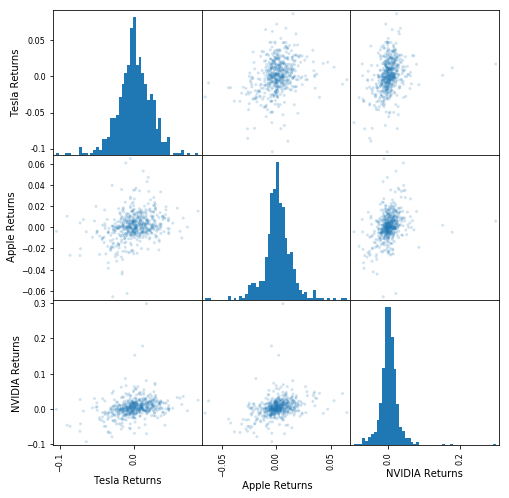

In [95]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** It looks like NVIDIA has correlations with both Apple and Telsa **

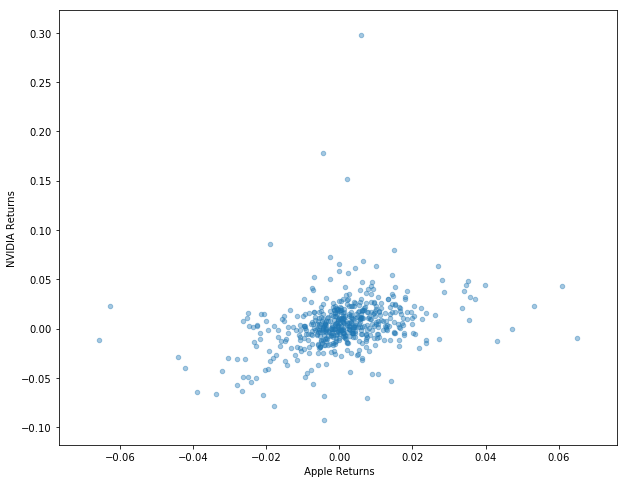

In [97]:
box_df.plot(kind='scatter',x=' Apple Returns',y='NVIDIA Returns',alpha=0.4,figsize=(10,8))

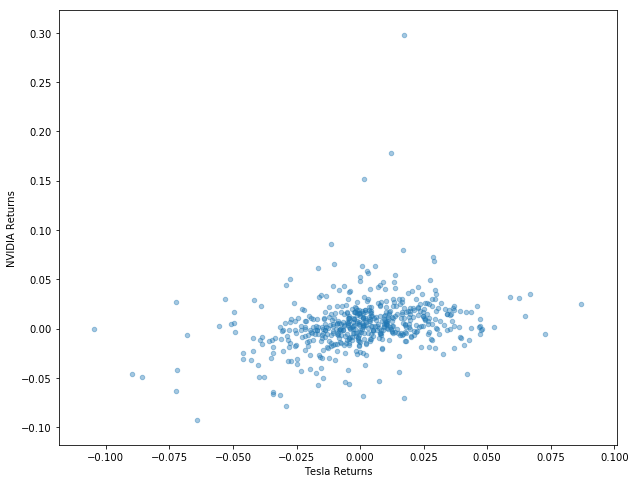

In [98]:
box_df.plot(kind='scatter',x='Tesla Returns',y='NVIDIA Returns',alpha=0.4,figsize=(10,8))

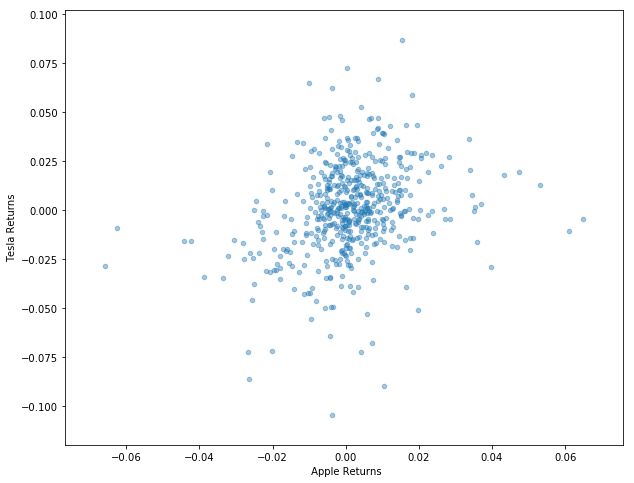

In [99]:
box_df.plot(kind='scatter',x=' Apple Returns',y='Tesla Returns',alpha=0.4,figsize=(10,8))

____
## Cumulative Daily Returns

We see which stock was the * most wide ranging in daily returns * 

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. 

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each company's dataframe.**

In [133]:
tsla_stock['cum_return'] = (1 + tsla_stock['returns']).cumprod()
aapl_stock['cum_return'] = (1 + aapl_stock['returns']).cumprod()
nvda_stock['cum_return'] = (1 + nvda_stock['returns']).cumprod()

KeyError: 'returns'

In [104]:
tsla_stock['cum_return'].head()

date
2016-01-04         NaN
2016-01-05    1.000090
2016-01-06    0.980440
2016-01-07    0.965266
2016-01-08    0.944452
Name: cum_return, dtype: float64

** Plot the Cumulative Return columns against the time series index ** 
* Which stock showed the highest return for a $1 invested? Which showed the lowest?

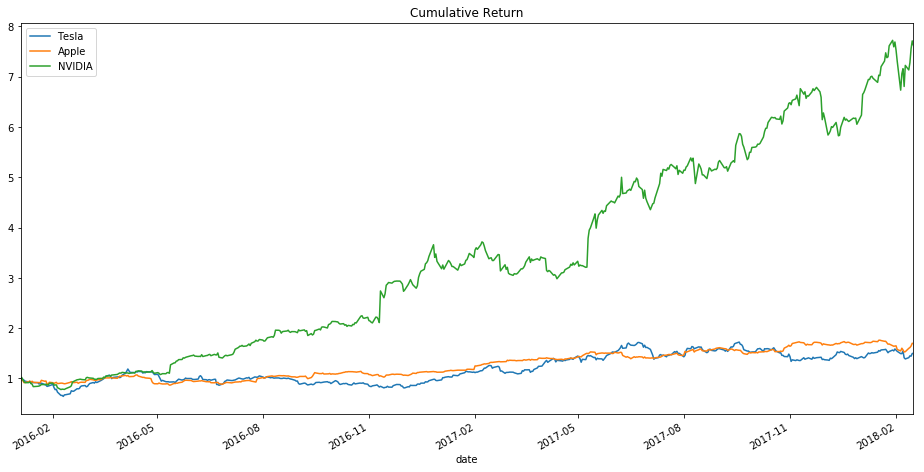

In [105]:
tsla_stock['cum_return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
aapl_stock['cum_return'].plot(label='Apple')
nvda_stock['cum_return'].plot(label='NVIDIA')
plt.legend()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

/home/unixdev/anaconda3/envs/pyfinance/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
nvda_stock.head()

,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,
2016-01-04,32.29,32.580,32.040,32.37,8951907.0,31.883763,32.170114,31.636908,31.962756,8951907.0
2016-01-05,32.98,33.440,32.500,32.89,12256814.0,32.565082,33.019295,32.091121,32.476214,12256814.0
2016-01-06,32.35,32.500,31.160,31.53,11233604.0,31.943008,32.091121,30.767979,31.133324,11233604.0
2016-01-07,30.74,30.953,29.880,30.28,16132575.0,30.353263,30.563583,29.504083,29.899050,16132575.0
2016-01-08,30.67,30.700,29.565,29.63,9961782.0,30.284144,30.313766,29.193046,29.257228,9961782.0


In [12]:
df_nv = nvda_stock['adj_close']

In [13]:
df_nv.head()

date
2016-01-04    31.962756
2016-01-05    32.476214
2016-01-06    31.133324
2016-01-07    29.899050
2016-01-08    29.257228
Name: adj_close, dtype: float64

# POC 4: Introducing Time Series Analysis

## ETS - Decomposition

### Trends, Seasonals, Noise

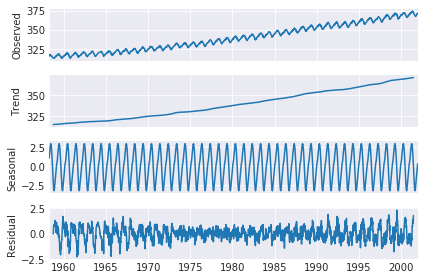

In [134]:
fig = result.plot()

**NVIDIA stock trend** - this graph's curvature is a sign that the data is exponentially increasing. Let's make a note of this fact and try to "flatten" it later. We will do this in a few steps.

* Let's replot NVIDIA stock as a reminder

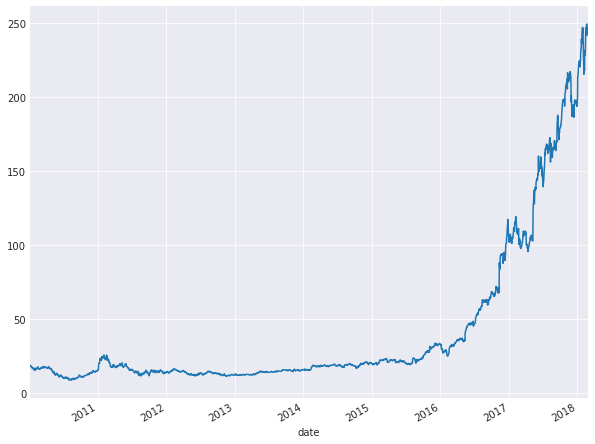

In [135]:
nvda_stock['close'].plot(figsize=(10,8), grid=True)

The data is clearly *non-stationary*. This makes sense for market data as it ***tends to go up in the long run more than it goes down***. This is a <strong style="color: red">problem</strong> for time series analysis though as non-stationary data is hard to reason about. 
<hr>
The first thing we can try is a *first difference of the series*. In other words, subtract the previous value **t-1** from the current value **t** to get the difference **d(t)**.

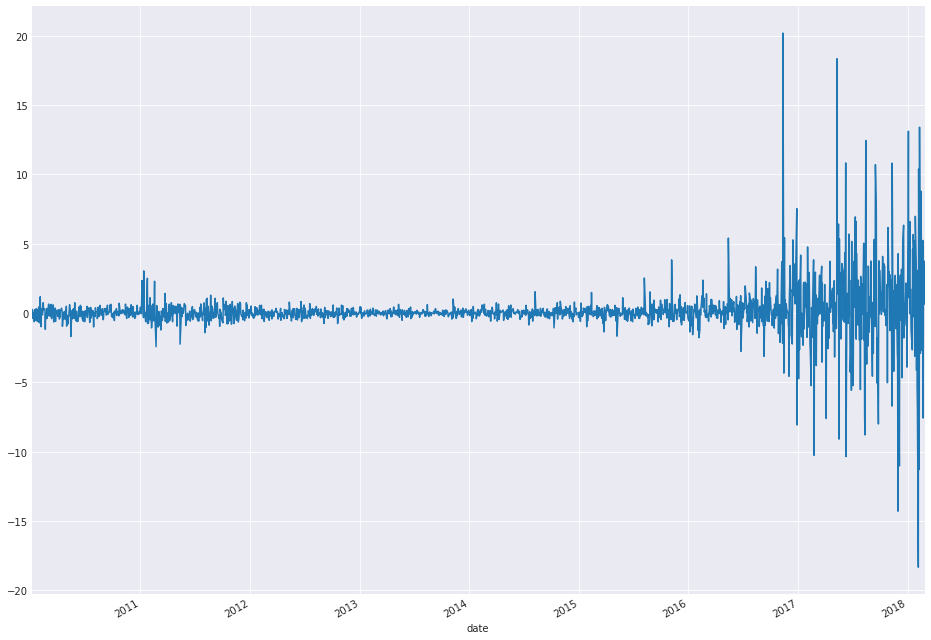

In [136]:
nvda_stock['1st_diff'] = nvda_stock['close'] - nvda_stock['close'].shift()  
nvda_stock['1st_diff'].plot(figsize=(16, 12), grid=True)  

The data <u>no longer appears to be trending up over time</u> and is instead centered around 0. 
<br>
There's *another problem though*. Look at the **variance**. It's very small early on and steadily increases over time. 
<br>
This is *a sign that the data is not only non-stationary but also exponentially increasing*. 
<br>
The magnitude of the day-to-day variations at present day completely dwarf the magnitude of the changes in 2016. 
<br>
To deal with this, we'll <span style="color: magenta">apply a <b>log transform</b> to the original series</span>.

* Let's apply the log transform to <strong style="color: lightgreen">NVIDIA</strong> close value

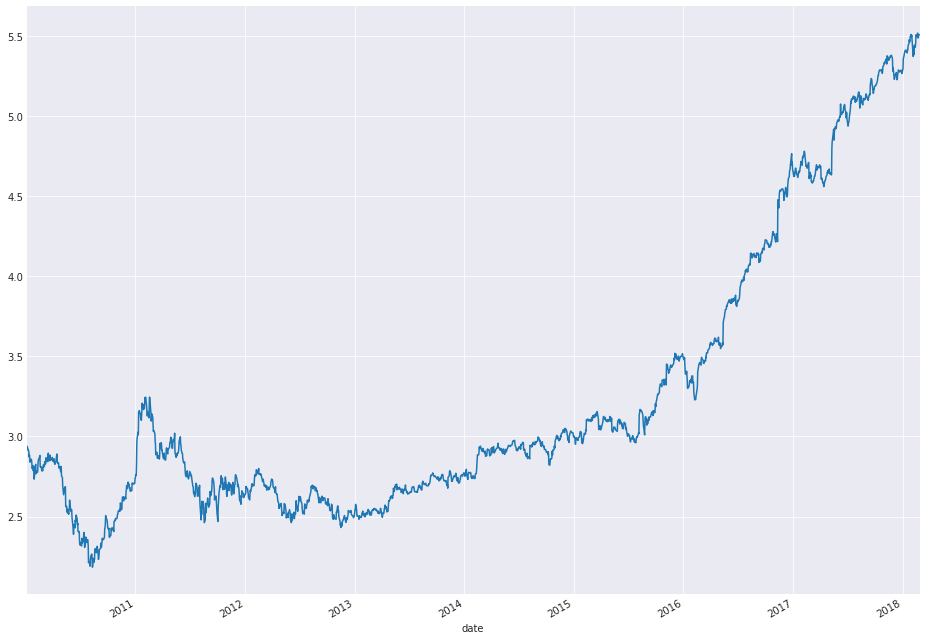

In [137]:
nvda_stock['nat_log'] = nvda_stock['close'].apply(lambda x: np.log(x))  
nvda_stock['nat_log'].plot(figsize=(16, 12), grid=True)  

This gives us the *original closing price* with a ***log transform*** applied to "flatten" the data from an exponential curve to a linear curve. 
<br>
One way to visually see the effect that the log transform had is to *analyze the variance over time*. 
<br>
We can use a <u>rolling variance statistic</u> and compare both the original series and the logged series.


* Plot Original and Log Variance on NVIDIA stock

/home/unixdev/anaconda3/envs/pyfinance/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  """Entry point for launching an IPython kernel.
/home/unixdev/anaconda3/envs/pyfinance/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  


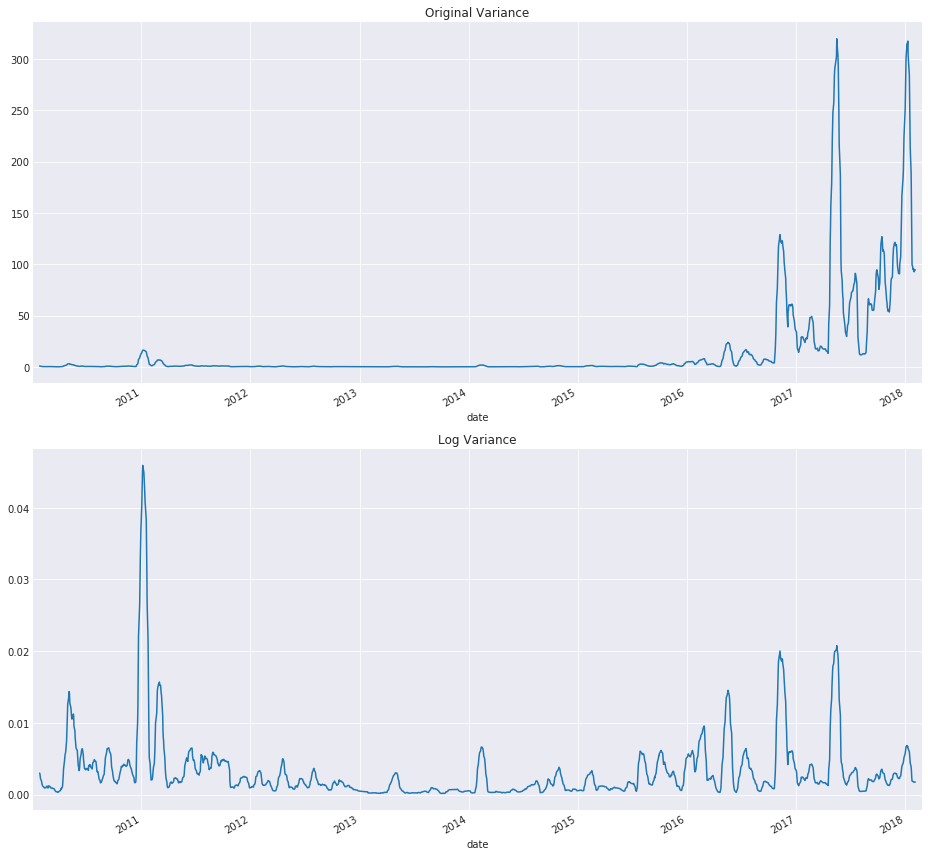

In [138]:
nvda_stock['original_variance'] = pd.rolling_var(nvda_stock['close'], 30, min_periods=None, freq=None, center=True)  
nvda_stock['log_variance'] = pd.rolling_var(nvda_stock['nat_log'], 30, min_periods=None, freq=None, center=True)

fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
nvda_stock['original_variance'].plot(ax=ax[0], title='Original Variance', grid=True)  
nvda_stock['log_variance'].plot(ax=ax[1], title='Log Variance', grid=True)  
fig.tight_layout()  

Observe that in the top graph - **Original Variance**, we can't observe any of the **variations** until approx. November of 2016. 
<br>
<br>
In the bottom graph - **Log Variance** however, changes in the value are clearly visible throughout the entire date range. Clearly, log transformation has made the variance relatively constant.
<br>
<br>
Now we can see the earlier variations in the data set quite a bit better than before. We still need to take the first difference though. Let's calculate that from the logged series.

* Plotting logged 1st difference for NVIDIA stock

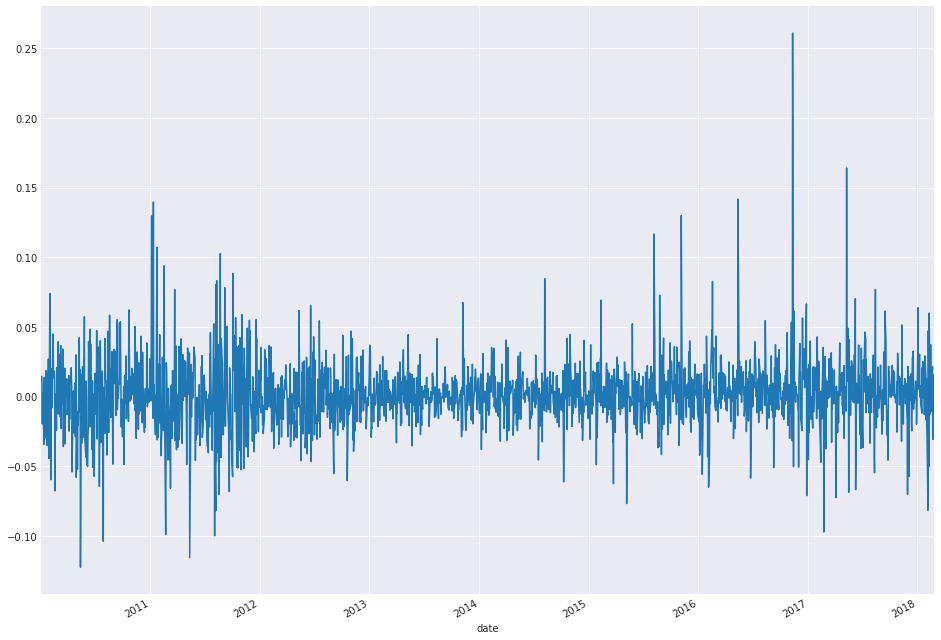

In [139]:
nvda_stock['logged_1st_diff'] = nvda_stock['nat_log'] - nvda_stock['nat_log'].shift()  
nvda_stock['logged_1st_diff'].plot(figsize=(16, 12), grid=True)

We now have a <strong style="color: red">stationary time series model of daily changes</strong> to the S&P 500 index. 
<br>
<br>
Now let's create some lag variables **y(t-1)**, **y(t-2)** etc. and examine their relationship to **y(t)**. 
<br><br>
We'll look at 
<ul>
<li>1-day lag</li>
<li>2-day lag</li>
<li>weekly lag</li>
<li>monthly lags</li>
</ul>
 to analyze **"seasonal" **effects.

In [140]:
nvda_stock['lag_1'] = nvda_stock['logged_1st_diff'].shift()  
nvda_stock['lag_2'] = nvda_stock['logged_1st_diff'].shift(2)  
nvda_stock['lag_5'] = nvda_stock['logged_1st_diff'].shift(5)  
nvda_stock['lag_30'] = nvda_stock['logged_1st_diff'].shift(30)

One interesting visual way to evaluate **the relationship between lagged variables** is to do a *scatter plot of the original variable vs. the lagged variable* and <u>see where the distribution lies</u>. 
<br><br>
We can do this with a joint plot using the seaborn package.

In [141]:
import seaborn as sb  
sb.set_style('darkgrid')

* Joint plot of logged first difference and 1-day lag

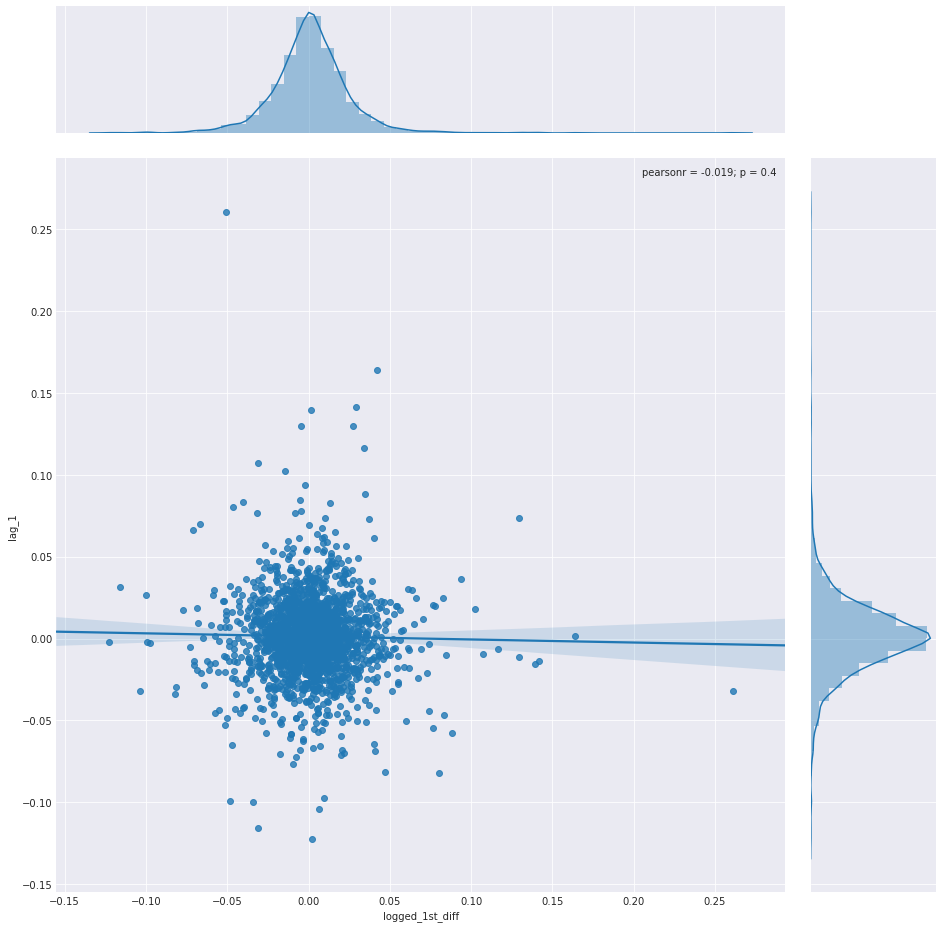

In [142]:
sb.jointplot('logged_1st_diff', 'lag_1', nvda_stock, kind='reg', size=13)  

Notice how ***tightly packed the mass is around 0***. It also appears to be pretty ***evenly distributed*** - the marginal distributions on both axes are roughly normal.
<br><br>
<u>This seems to suggest that knowing the index value one day doesn't tell us much about what it will do the next day.</u>
<br><br>
It probably comes as no surprise that there's ***very little correlation between the change in value from one day to the next***. 
<br><br>
**Note:** The other lagged variables that we created would show similar results. 
<br><br>
There could be a relationship to other lag steps that we haven't tried, but it's impractical to test every possible lag value manually. Fortunately there is a class of functions that can systematically do this for us.

* Auto-Correlation Function & Partial Auto-Correlation Function

In [143]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(nvda_stock['logged_1st_diff'].iloc[1:])  
lag_partial_correlations = pacf(nvda_stock['logged_1st_diff'].iloc[1:])

The **auto-correlation function** computes the correlation between a variable and itself at each lag step up to some limit (in this case 40). 
<br><br>
The **partial auto-correlation function** computes the correlation at each lag step that is NOT already explained by previous, lower-order lag steps.
<br><br>
Let's plot the results to see ***if there are any significant correlations***.

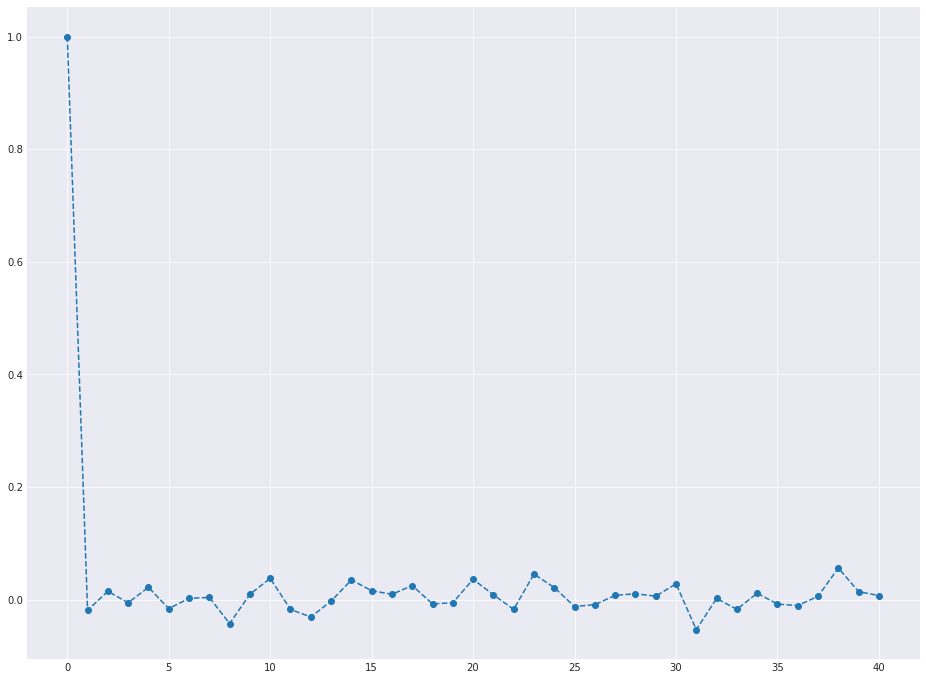

In [144]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')

The auto-correlation and partial-autocorrelation (below) results are very close to each other (We plotted the auto-correlation results above). What this shows is that there is no significant (> 0.2) correlation between the value at time **t** and at any time prior to **t** up to 40 steps behind. In order words, the series is a random walk.


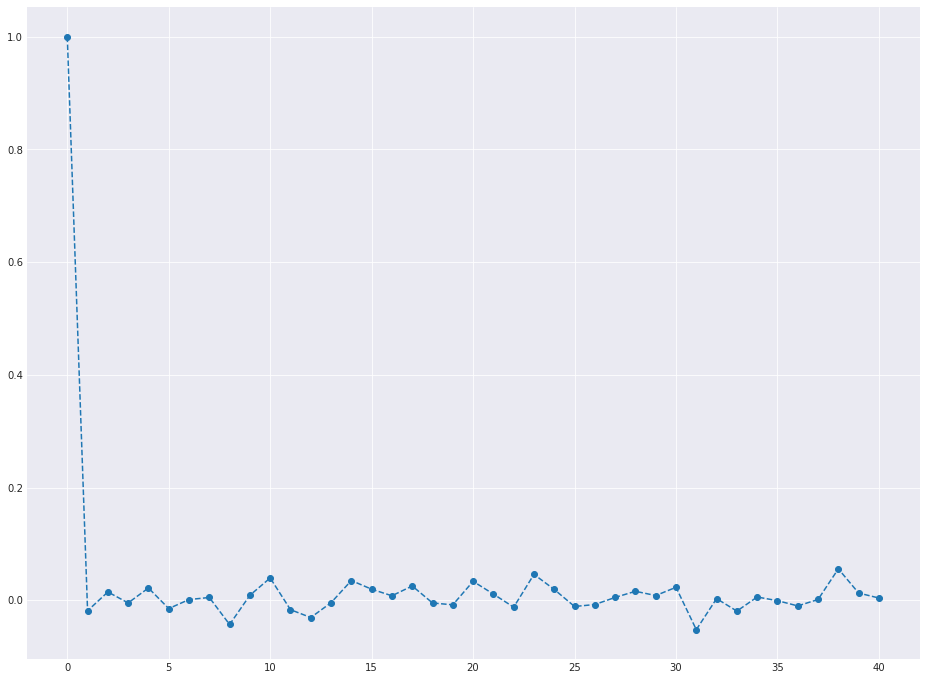

In [145]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_partial_correlations, marker='o', linestyle='--')

Another interesting technique we can try is a **decomposition**. This is a technique that attempts to break down a time series into trend, seasonal, and residual factors. 

### Decomposition

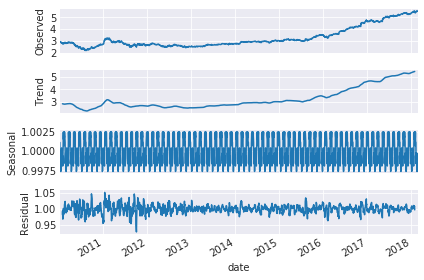

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(nvda_stock['nat_log'], model='multiplicative', freq=30)  
fig = plt.figure()  
fig = decomposition.plot()

There is real cycle in NVIDIA stock behavior, and the visualization is very effective in capturing this. For any stock, where there is a strong seasonal pattern, this can be **very useful**. 
<br><br>
The folling instance, for example, is a sample from the statsmodels documentation showing CO2 emissions data over time.

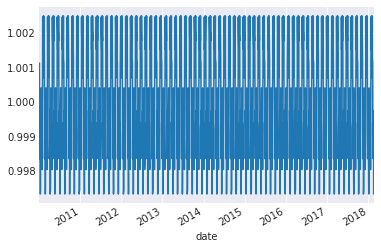

In [164]:
fig = decomposition.seasonal.plot()

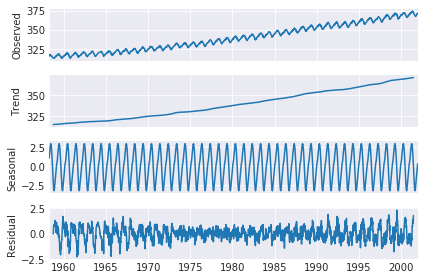

In [50]:
import statsmodels.api as sm
co2_data = sm.datasets.co2.load_pandas().data  
co2_data.co2.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(co2_data.co2)  
fig = plt.figure()  
fig = result.plot()

The decomposition is much more useful in this case. There are three clearly distinct components to the time series - a trend line, a seasonal adjustment, and residual values. Each of these would need to be accounted for and modeled appropriately.

Going back to our stock data, we're already observed that it's a random walk and that our lagged variables don't seem to have much impact, but we can still try fitting some ARIMA models and see what we get. Let's start with a simple moving average model.

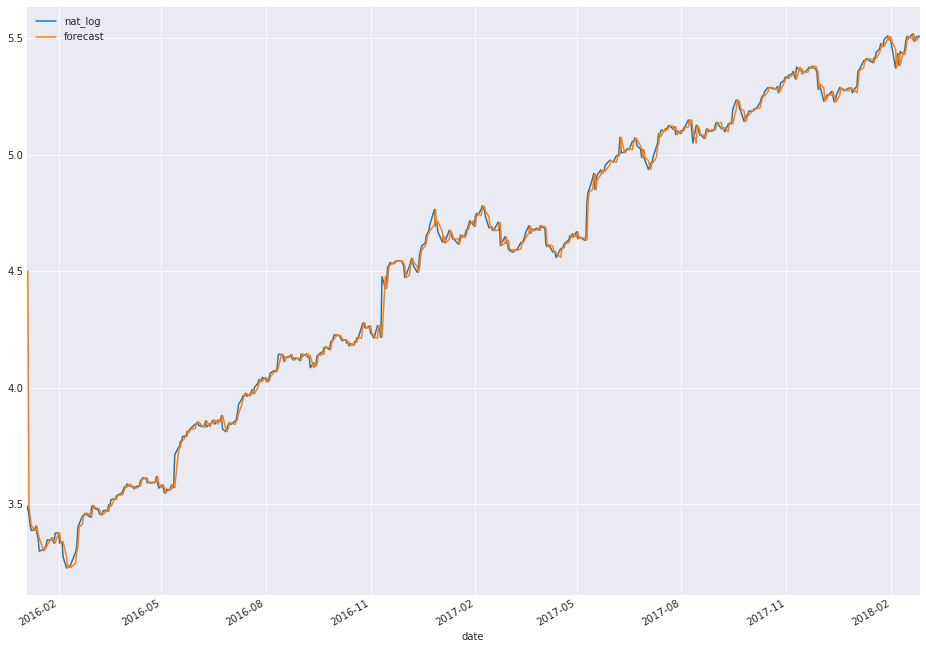

In [51]:
model = sm.tsa.ARIMA(nvda_stock['nat_log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
nvda_stock['forecast'] = results.fittedvalues  
nvda_stock[['nat_log', 'forecast']].plot(figsize=(16, 12))

So at first glance it seems like this model is doing pretty well. But although it appears like the forecasts are really close (the lines are almost indistinguishable after all), remember that we used the un-differenced series! The index only fluctuates a small percentage day-to-day relative to the total absolute value. What we really want is to predict the first difference, or the day-to-day moves. We can either re-run the model using the differenced series, or add an "I" term to the ARIMA model (resulting in a (1, 1, 0) model) which should accomplish the same thing. Let's try using the differenced series.

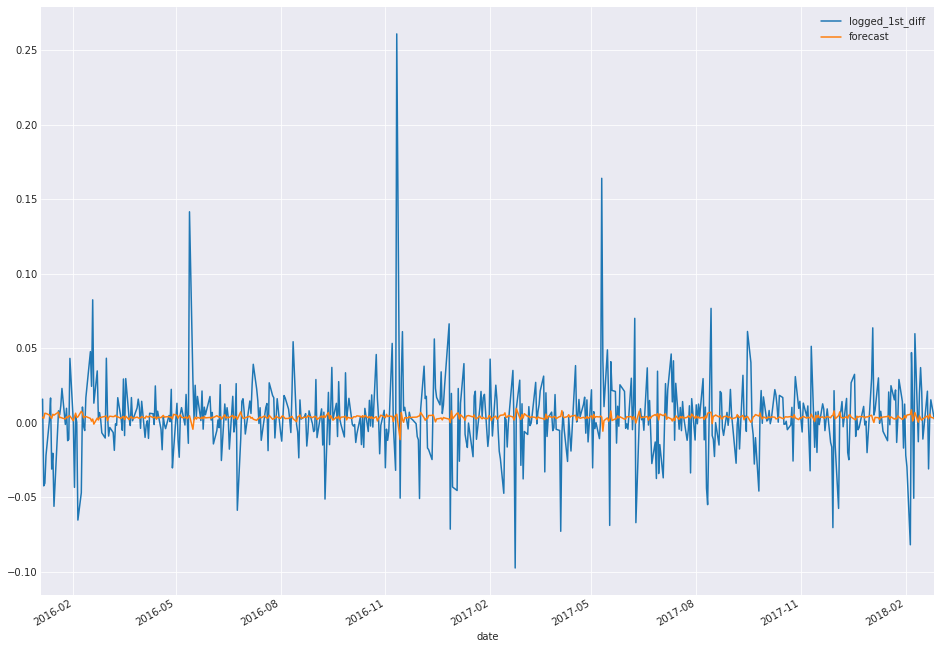

In [52]:
model = sm.tsa.ARIMA(nvda_stock['logged_1st_diff'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
nvda_stock['forecast'] = results.fittedvalues  
nvda_stock[['logged_1st_diff', 'forecast']].plot(figsize=(16, 12))  


It's a little hard to tell, but it appears like our forecasted changes are generally much smaller than the actual changes. It might be worth taking a closer look at a subset of the data to see what's really going on.

In [56]:
nvda_stock.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15',
               '2018-02-16', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-26'],
              dtype='datetime64[ns]', name='date', length=540, freq=None)

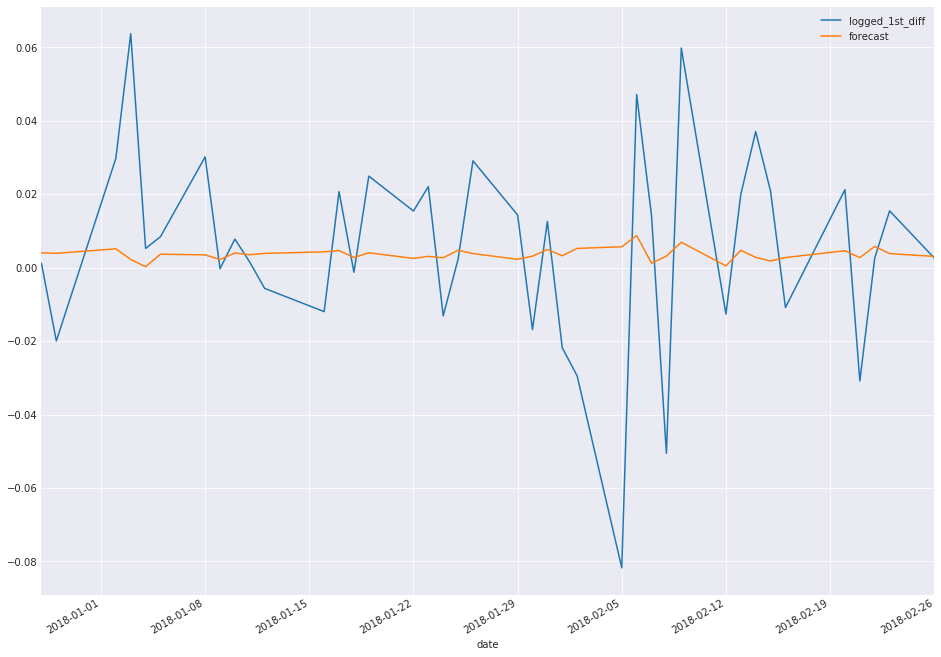

In [57]:
nvda_stock[['logged_1st_diff', 'forecast']].iloc[500:540, :].plot(figsize=(16, 12))  


So now it's pretty obvious that the forecast is way off. We're predicting tiny little variations relative to what is actually happening day-to-day. Again, this is more of less expected with a simple moving average model of a random walk time series. There's not enough information from the previous days to accurately forcast what's going to happen the next day.

A moving average model doesn't appear to do so well. What about an exponential smoothing model? Exponential smoothing spreads out the impact of previous values using an exponential weighting, so things that happened more recently are more impactful than things that happened a long time ago. Maybe this "smarter" form of averaging will be more accurate?

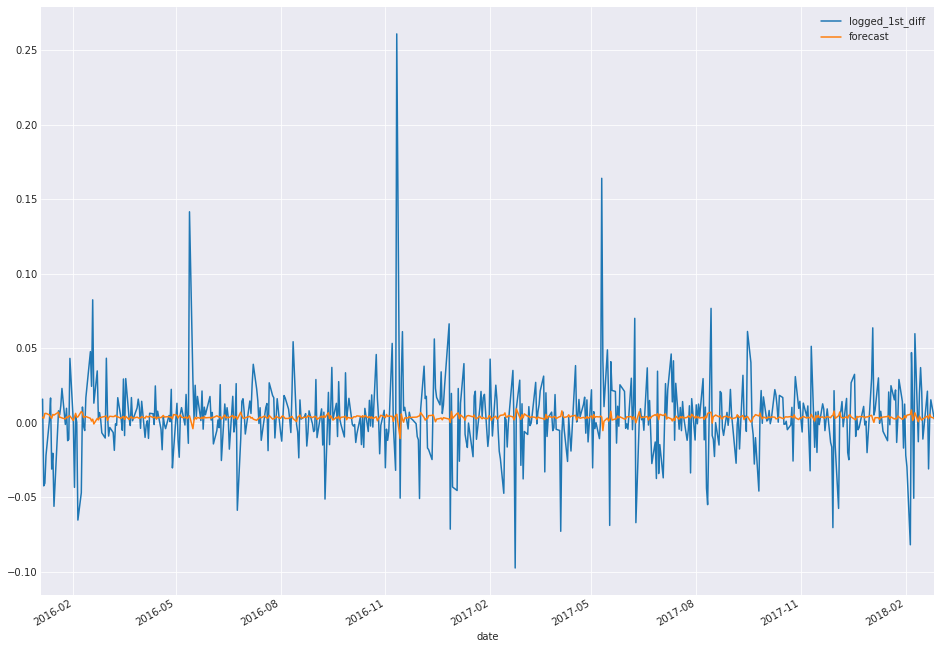

In [58]:
model = sm.tsa.ARIMA(nvda_stock['logged_1st_diff'].iloc[1:], order=(0, 0, 1))  
results = model.fit(disp=-1)  
nvda_stock['forecast'] = results.fittedvalues  
nvda_stock[['logged_1st_diff', 'forecast']].plot(figsize=(16, 12))  